In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, FuncFormatter
import torch, pickle, sys, numpy
sys.path.append('/home/dgotzens/scripts/')
import pdfdefaults as pdf
# setup
#pdf.setup()
nfft = 2**18

pi = 3.141592653589 
maxdist = 50
lightspeed = 299_792_458 
f_start, f_end = 76_009_996_288.0, 80_289_505_280.0
t_chirp = 0.000_064_890_002_249_740_060
hertz_per_meter = (f_end-f_start) / t_chirp / lightspeed
bins_per_meter = nfft / maxdist

folder = '/home/dgotzens/scripts/2.2_antenna-characteristics/measured/'
params = pickle.load(open(folder+'feparams.pkl', 'rb'))
refllocs = pickle.load(open(folder+'refl_params.pkl', 'rb'))
tx,ty,rx,ry = params['txPosX'], params['txPosY'], params['rxPosX'], params['rxPosY']

def r_est(R, theta0, exc, theta, K=len(tx)):
    txpos = torch.tensor([tx,ty,[-exc]*K])
    rxpos = torch.tensor([rx,ry,[-exc]*K])
    reflpos = (R-exc)*torch.stack([-torch.sin(theta-theta0),\
                            torch.zeros(len(theta)), \
                            torch.cos(theta-theta0)],0)

    return 0.5*torch.sqrt(((txpos[:,:,None]-reflpos[:,None,:])**2).sum(0))\
          + 0.5*torch.sqrt(((rxpos[:,:,None]-reflpos[:,None,:])**2).sum(0))

tensor(-0.0100)


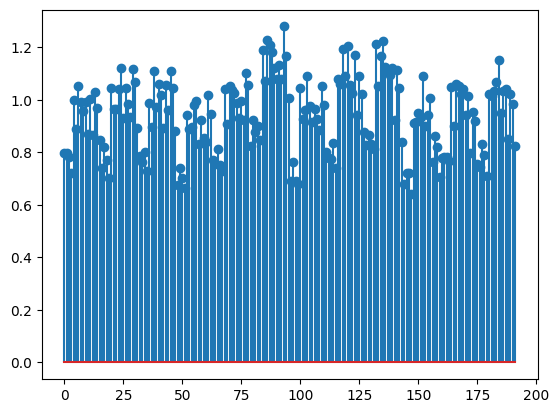

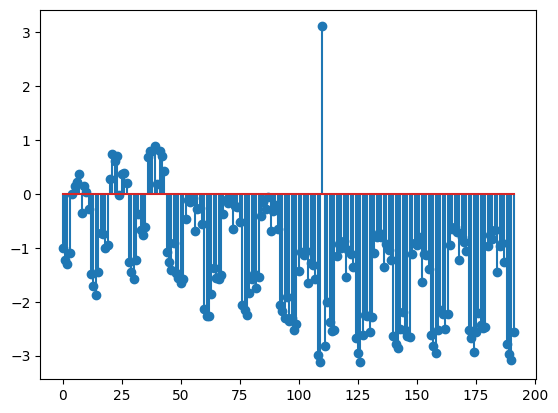

In [6]:
angle = torch.tensor(pickle.load(open(folder+'schwenks_03_angle.pkl', 'rb')))
l_zero = (angle-pi/2).abs().argmin()
print(angle[l_zero]*180/pi-90)
fft = torch.load(folder+'schwenks_03_bp_fft.pt')[:,:,l_zero]
M,K = fft.shape

m_refl = fft.abs().argmax(0)
calib = fft[m_refl,range(K)]
calib /= calib.clone()[4]

plt.stem(calib.abs())
plt.show()
plt.stem(calib.angle())
plt.show()

torch.save(calib, folder+'schwenks_channelgains.pt')
